In [ ]:
#read text from folder into python

import os
import glob

pathin = ''

os.chdir(pathin)

for file in glob.glob('*.txt'):
    with open(file,'r') as f:
        text = f.read()

In [1]:
def wrangleSternberg(raw):


    # create a new dataframe with only the data we need from raw
    df = pd.DataFrame({'sessionid': raw['sessionid'],
                       'block': raw['block'],
                       'correct': raw['correct'],
                       'setSize': raw['setSize'],
                       'present': raw['present'],
                       'rt': raw['response_time']})

    # find all the unique session id's from the raw data
    ids = list(set(df['sessionid']))

    # make a new column with a simple ID number for each participant
    id = []
    for s, val in enumerate(df['sessionid']):
        for i, num in enumerate(ids):
            if val == num:
                id.append(i+1)            
    df['id'] = id


    ids = list(set(df['id']))
    

    # remove practice trials
    df = df.loc[df['block'] != "practice"]

    # keep only correct answers
    df = df.loc[df['correct'] == 1]

    # keep only the data we need
    keep = ['id', 'setSize', 'present','rt']
    df = df[keep]

    #group_by(setSize, present, id) 
    data = df.groupby(['setSize', 'present', 'id']).agg('mean')

    # de-sparsify the dataframe index
    data = data.reset_index()
    
    # print the number of participants we have data for
    print("Data for", len(list(set(df['id']))), "participants.")

    return(data)


In [2]:
import pandas as pd

file = "/Users/ethan/Documents/GitHub/ExPsyLing/datasets/Sternberg/2021/ExPsyLing_Sternberg_2021.csv"

raw = pd.read_csv(file)


In [3]:
data = wrangleSternberg(raw)

Data for 26 participants.


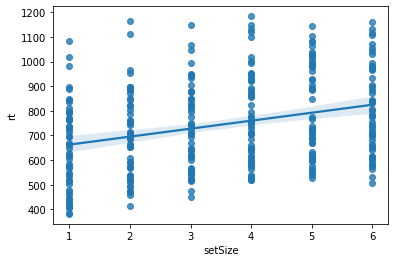

In [4]:
import seaborn as sns
ax = sns.regplot(x = 'setSize', y = 'rt', data = data)

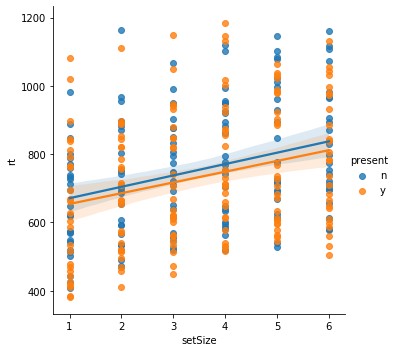

In [68]:
ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present"
)

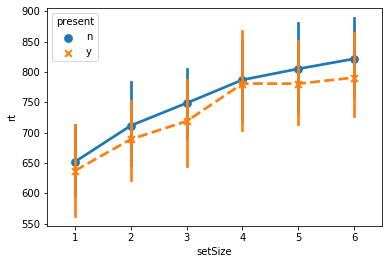

In [5]:
ax = sns.pointplot(x="setSize", y="rt", hue="present", data=data, markers=["o","x"], linestyles=["-","--"])

In [6]:
data['setSize'].corr(data['rt'])

0.2977108630272634

In [7]:
import scipy
scipy.stats.pearsonr(data['setSize'], data['rt'])

(0.29771086302726346, 8.343931288025603e-08)